## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#hide warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

#mouse_metadata.head()
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
pymaceutical_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how="left")

#Show Data
pymaceutical_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimen_group =pymaceutical_data.groupby('Drug Regimen')

#Calculations
tumor_vlmean = drug_regimen_group['Tumor Volume (mm3)'].mean()
tumor_vlmedian =drug_regimen_group['Tumor Volume (mm3)'].median()
tumor_vlvar =drug_regimen_group['Tumor Volume (mm3)'].var()
tumor_vlstd =drug_regimen_group['Tumor Volume (mm3)'].std()
tumor_vlsem =drug_regimen_group['Tumor Volume (mm3)'].sem() 
tumor_vlcount =drug_regimen_group['Tumor Volume (mm3)'].count() 
                                 
drug_regimen_summary = pd.DataFrame({"Tumor Vol_Mean": tumor_vlmean , "Tumor Vol_Median": tumor_vlmedian,
    "Tumor Vol_Var" : tumor_vlvar, "Tumor Vol_Std" : tumor_vlstd, "Tumor Vol_SEM" : tumor_vlsem})
                     
#Show summary table
drug_regimen_summary.head(10)

,Tumor Vol_Mean,Tumor Vol_Median,Tumor Vol_Var,Tumor Vol_Std,Tumor Vol_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

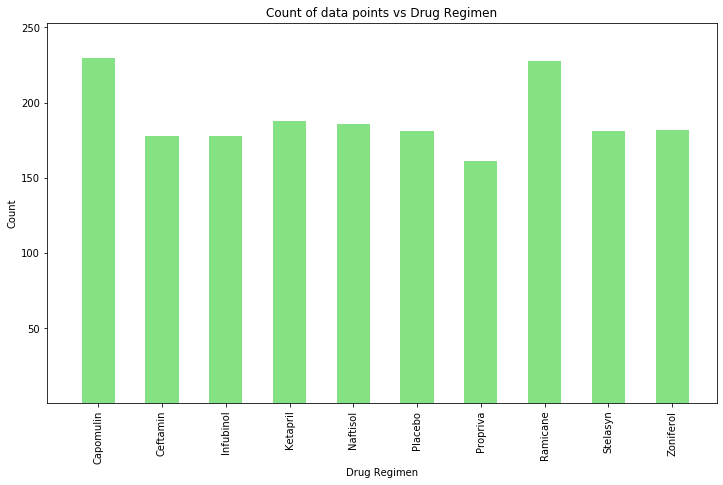

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#Dataframe for summary of results
drug_group_count = pd.DataFrame(drug_regimen_group.count())

# Set x axis and tick locations
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(12,7))

plt.bar(x_axis, drug_group_count["Mouse ID"], color='limegreen',alpha=0.6, align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.8, len(x_axis)-0.3)
plt.ylim(0.1, max(drug_group_count["Mouse ID"])*1.1)

# Set Title and labels
plt.title("Count of data points vs Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
column_name = ["Drug Regimen"]

# Save the figure
plt.savefig("../Pymaceuticals/Pandas_bar.png")

#Show plot
plt.show()

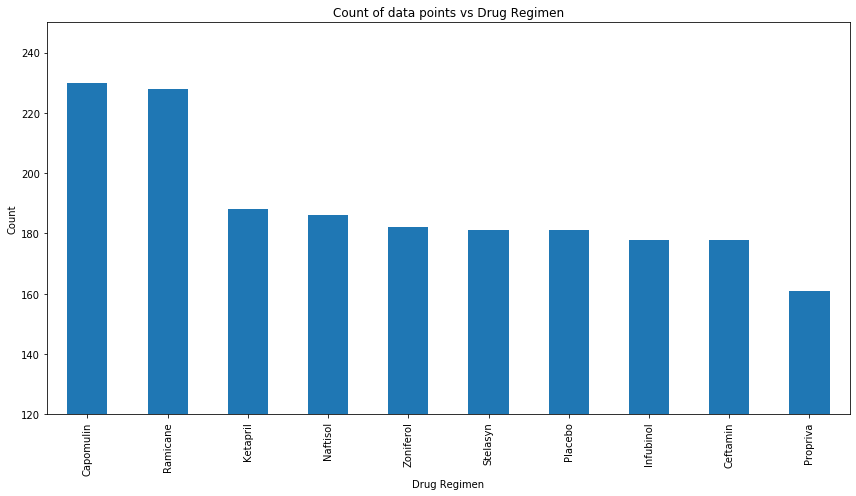

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

Drug_Regimen_df= pymaceutical_data.groupby('Drug Regimen').count()['Mouse ID'].sort_values(ascending=False).to_frame()

Drug_chart=Drug_Regimen_df.plot(kind="bar", figsize=(12,7), ylim=(120,250),legend=False,
                                title="Count of data points vs Drug Regimen")

# Set the xlabel and ylabel using class methods
Drug_chart.set_xlabel("Drug Regimen")
Drug_chart.set_ylabel("Count")
plt.tight_layout()

# Save the figure
plt.savefig("../Pymaceuticals/Pyplot_bar.png")

#Show plot
plt.show(block = True)


## Pie plots

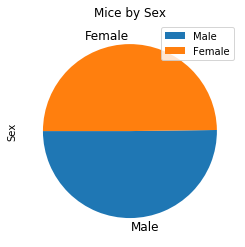

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_data=pymaceutical_data[['Mouse ID','Sex']].drop_duplicates()['Sex'].value_counts().to_frame()

#Separate male and female
male_female_list = sex_data.keys()

# Build pie chart
sex_pie = sex_data.plot(kind="pie", y=male_female_list, shadow = False,startangle= 180, fontsize=12,  title="Mice by Sex")

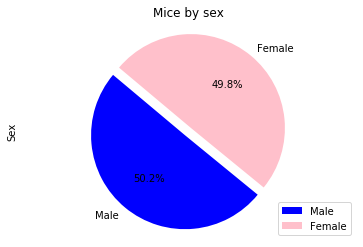

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Set colors
colors = ["blue", "pink"]
explode = (0.10, 0)

#Build pie chart
plt.pie(sex_data['Sex'], explode=explode, labels=sex_data.index, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("Mice by sex")
plt.ylabel("Sex")
plt.legend(loc='lower right')
plt.axis("equal")


#Show plot
plt.show()

## Quartiles, outliers and boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Calculate the IQR and quantitatively determine outliers.

IQR_df=pymaceutical_data[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]

#extract the final tumor volume for each mouse
final_mouse_df=pd.DataFrame(columns=['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)'])
row_count=0
for i, row in IQR_df.loc[1:len(pymaceutical_data),].iterrows():
    if IQR_df.loc[i-1]['Mouse ID'] != IQR_df.loc[i]['Mouse ID']:
        final_mouse_df.loc[row_count]=IQR_df.loc[i-1]
        row_count+=1
        
#add the last mouse
final_mouse_df.loc[len(final_mouse_df)]=IQR_df.loc[len(IQR_df)-1]


#Capomulin Drug df
Capomulin_drug=final_mouse_df[final_mouse_df['Drug Regimen']=="Capomulin"]

#Ketapril Drug df
Ketapril_drug=final_mouse_df[final_mouse_df['Drug Regimen']=="Ketapril"]

#Infubinol Drug df
Infubinol_drug=final_mouse_df[final_mouse_df['Drug Regimen']=="Infubinol"]

#Placebo Drug df
Placebo_drug=final_mouse_df[final_mouse_df['Drug Regimen']=="Placebo"]


#Displaying outliers

#Capomulin df
Capomulin_df_quartiles = Capomulin_drug['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = Capomulin_df_quartiles[0.25]
upperq = Capomulin_df_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2) 
outlier=Capomulin_drug[(Capomulin_drug['Tumor Volume (mm3)'] < lower_bound) | (Capomulin_drug['Tumor Volume (mm3)'] > upper_bound)]
number_of_outliers=len(outlier)

if number_of_outliers>0:
    print(f"There are {number_of_outliers} outliers in the Capomulin treatment regimen, which are \n {outlier} \n")
else:
    print(f"No outliers in the Capomulin treatment regimen.")


#Ketapril df
Ketapril_df_quartiles = Ketapril_drug['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = Ketapril_df_quartiles[0.25]
upperq = Ketapril_df_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
outlier=Ketapril_drug[(Ketapril_drug['Tumor Volume (mm3)'] < lower_bound) | (Ketapril_drug['Tumor Volume (mm3)'] > upper_bound)]
number_of_outliers=len(outlier)
if number_of_outliers>0:
    print(f"There are {number_of_outliers} outliers in the Ramicane treatment regimen, which are \n {outlier} \n")
else:
    print(f"No outliers in the Ramicane treatment regimen.")

#Infubinol df
Infubinol_df_quartiles = Infubinol_drug['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = Infubinol_df_quartiles[0.25]
upperq = Infubinol_df_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
outlier=Infubinol_drug[(Infubinol_drug['Tumor Volume (mm3)'] < lower_bound) | (Infubinol_drug['Tumor Volume (mm3)'] > upper_bound)]
number_of_outliers=len(outlier)
if number_of_outliers>0:
    print(f"There are {number_of_outliers} outliers in the Infubinol treatment regimen, which are \n {outlier}\n")
else:
    print(f"No outliers in the Infubinol treatment regimen.\n")


#Placebo df
Placebo_df_quartiles = Placebo_drug['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = Placebo_df_quartiles[0.25]
upperq = Placebo_df_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
outlier=Placebo_drug[(Placebo_drug['Tumor Volume (mm3)'] < lower_bound) | (Placebo_drug['Tumor Volume (mm3)'] > upper_bound)]
number_of_outliers=len(outlier)
if number_of_outliers>0:
    print(f"There are {number_of_outliers} outliers in the Placebo drug regimen, which are \n {outlier} ")
else:
    print(f"No outliers in the Placebo treatment regimen.")

No outliers in the Capomulin treatment regimen.
No outliers in the Ramicane treatment regimen.
There are 1 outliers in the Infubinol treatment regimen, which are 
    Mouse ID Drug Regimen  Tumor Volume (mm3)
74     c326    Infubinol           36.321346

No outliers in the Placebo treatment regimen.


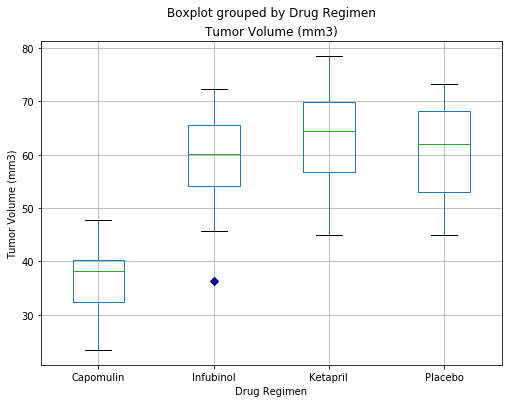

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
filter_df=final_mouse_df[(final_mouse_df['Drug Regimen']=="Capomulin") | (final_mouse_df['Drug Regimen']=="Ketapril") | 
            (final_mouse_df['Drug Regimen']=="Infubinol") | (final_mouse_df['Drug Regimen']=="Placebo")]
fig, ax = plt.subplots(figsize=(8,6))
red_square = dict(markerfacecolor='b', marker='D', markersize=5)
box_plot = filter_df.boxplot(ax=ax, column = 'Tumor Volume (mm3)', by = 'Drug Regimen', flierprops=red_square)
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()


## Line and scatter plots

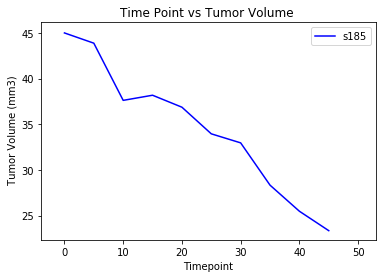

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_drug_df=pymaceutical_data[pymaceutical_data['Drug Regimen']=='Capomulin'].set_index('Mouse ID')
plt.plot(Capomulin_drug_df.loc['s185','Timepoint'], Capomulin_drug_df.loc['s185','Tumor Volume (mm3)'], color="blue")
plt.legend(['s185'], loc="best")
plt.xlabel("Timepoint")
plt.ylabel(" Tumor Volume (mm3)")
plt.title("Time Point vs Tumor Volume ")
plt.xlim(min(Capomulin_drug_df['Timepoint'])-4, max(Capomulin_drug_df['Timepoint'])+8)
plt.ylim(min(Capomulin_drug_df['Tumor Volume (mm3)'])-1, max(Capomulin_drug_df['Tumor Volume (mm3)'])-2)
plt.show()


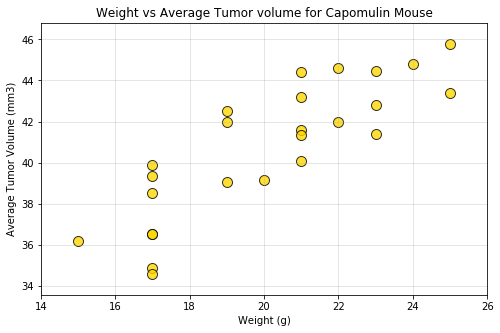

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_drug_df=pymaceutical_data[["Mouse ID","Drug Regimen","Weight (g)","Tumor Volume (mm3)"]]
avg_Capomulin_df=weight_drug_df[weight_drug_df['Drug Regimen']=='Capomulin'].groupby('Mouse ID').mean().reset_index()

# Build scatter plot 
plt.figure(figsize=(8,5))
scatter=plt.scatter(avg_Capomulin_df["Weight (g)"],avg_Capomulin_df["Tumor Volume (mm3)"], marker="o", 
            color="Gold", edgecolors="black", s=100, alpha=0.8)
plt.xlim(min(avg_Capomulin_df["Weight (g)"])-1, max(avg_Capomulin_df["Weight (g)"])+1)
plt.ylim(min(avg_Capomulin_df["Tumor Volume (mm3)"]-1), max(avg_Capomulin_df["Tumor Volume (mm3)"])+1)
plt.title("Weight vs Average Tumor volume for Capomulin Mouse")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#Show gridlines
plt.grid(alpha = 0.4)

#Show plot
plt.show()

The correlation coefficient is 0.84


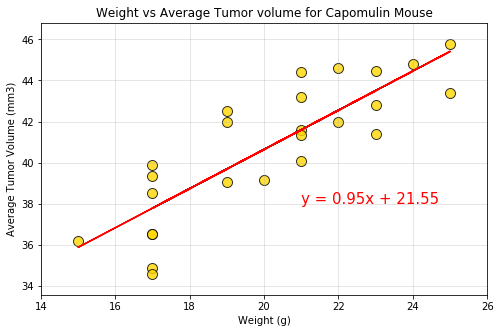

In [19]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight_drug_df=pymaceutical_data[["Mouse ID","Drug Regimen","Weight (g)","Tumor Volume (mm3)"]]
avg_Capomulin_df=weight_drug_df[weight_drug_df['Drug Regimen']=='Capomulin'].groupby('Mouse ID').mean().reset_index()

# Build scatter plot 
plt.figure(figsize=(8,5))
scatter=plt.scatter(avg_Capomulin_df["Weight (g)"],avg_Capomulin_df["Tumor Volume (mm3)"], marker="o", 
            color="Gold", edgecolors="black", s=100, alpha=0.8)
plt.xlim(min(avg_Capomulin_df["Weight (g)"])-1, max(avg_Capomulin_df["Weight (g)"])+1)
plt.ylim(min(avg_Capomulin_df["Tumor Volume (mm3)"]-1), max(avg_Capomulin_df["Tumor Volume (mm3)"])+1)
plt.title("Weight vs Average Tumor volume for Capomulin Mouse")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#Show gridlines
plt.grid(alpha = 0.4)


print(f"The correlation coefficient is \
{round(st.pearsonr(avg_Capomulin_df['Weight (g)'],avg_Capomulin_df['Tumor Volume (mm3)'])[0], 2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_Capomulin_df['Weight (g)'], avg_Capomulin_df['Tumor Volume (mm3)'])
regress_values = avg_Capomulin_df['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#draw linear regression line
linear_regression=plt.plot(avg_Capomulin_df['Weight (g)'], regress_values, "r-")
plt.annotate(line_eq, (21,38), fontsize=15, color="red")
      
#Show plot
plt.show()